# ***ANALISIS ESTADISTICO***

1. [Analisis Descriptivo](#scrollTo=8x1lgS50jmgj)
2. [Analisis de Correlacion](#scrollTo=pZ6jUW5ZnpPr)
3. [Visualizacion de datos](#scrollTo=nkDq0XbNkVDR)
4. [Análisis de fraude](#scrollTo=PrtrQQuIp3tg)  



### ***Librerias***

In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### ***Cargar datos***

In [10]:
df = pd.read_parquet('/content/drive/MyDrive/C16-103-t-data-bi/DATASCIENCE- DETECCION DE FRAUDES/TRANSFORMACIONES/data_transf.parquet', engine='pyarrow')

In [35]:
df.sample(10)

,step,amount,nameOrig,nameDest,isFraud,type_CASH_OUT,type_TRANSFER
1145040,208,123241.08,C959709091,C1286149344,0,1,0
228509,20,320156.83,C618257924,C573103075,0,1,0
174368,18,18301.59,C196198340,C1592044680,0,1,0
2624659,451,146645.66,C1707666102,C1711321960,0,1,0
757130,160,5881.85,C1008971340,C1944151824,0,1,0
1349814,235,95529.86,C1920623347,C1413390395,0,1,0
2599349,405,323353.23,C283581048,C131197066,0,1,0
626635,139,52382.14,C1208720686,C125626695,0,1,0
878584,179,474499.11,C1329350024,C761008998,0,0,1
2425229,384,179167.59,C1432936095,C1666434454,0,1,0


### ***Análisis descriptivo***

In [16]:
print(df[["amount"]].describe())
print("\n")

             amount       isFraud
count  2.767966e+06  2.767966e+06
mean   3.004257e+05  2.967161e-03
std    6.062929e+05  5.439079e-02
min    0.000000e+00  0.000000e+00
25%    8.290016e+04  0.000000e+00
50%    1.710923e+05  0.000000e+00
75%    3.062524e+05  0.000000e+00
max    1.000000e+07  1.000000e+00




***Interpretacion:***

### ***Analisis de correlación***

<ipython-input-28-96ac31f4967e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Blues')


<Axes: >

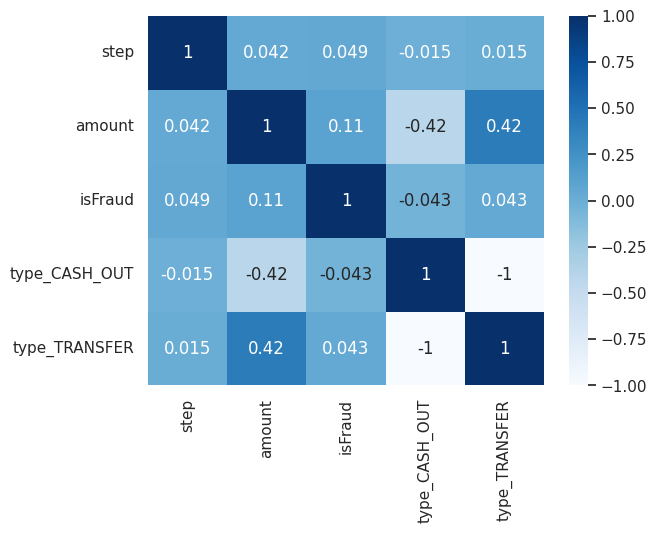

In [28]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')

### ***Visualizacion de datos***

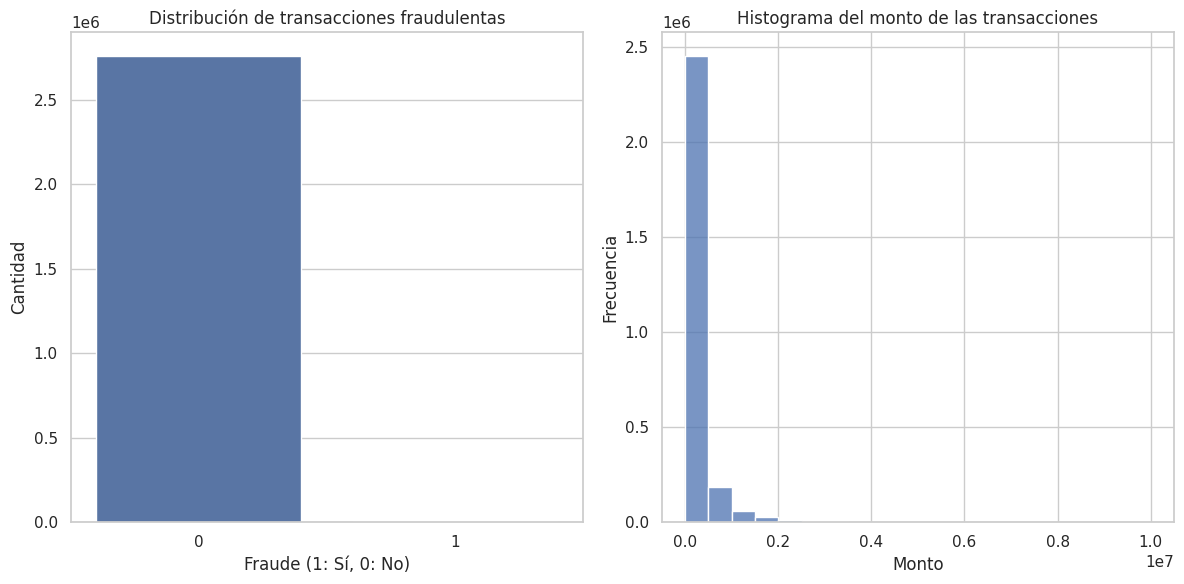

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(x='isFraud', data=df, ax=axes[0])
axes[0].set_title('Distribución de transacciones fraudulentas')
axes[0].set_xlabel('Fraude (1: Sí, 0: No)')
axes[0].set_ylabel('Cantidad')

sns.histplot(df['amount'], bins=20, ax=axes[1])
axes[1].set_title('Histograma del monto de las transacciones')
axes[1].set_xlabel('Monto')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()

plt.show()

### ***Análisis de fraude***

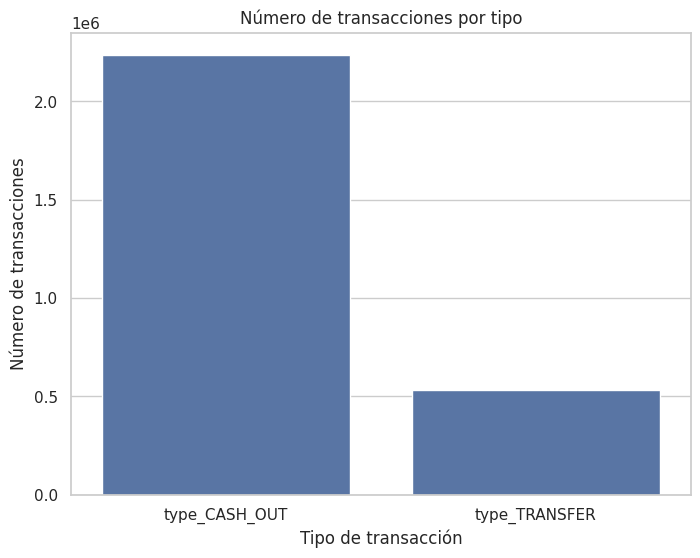

In [30]:
transactions_by_type = df[['type_CASH_OUT', 'type_TRANSFER']].sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=transactions_by_type.index, y=transactions_by_type.values)
plt.title('Número de transacciones por tipo')
plt.xlabel('Tipo de transacción')
plt.ylabel('Número de transacciones')
plt.show()

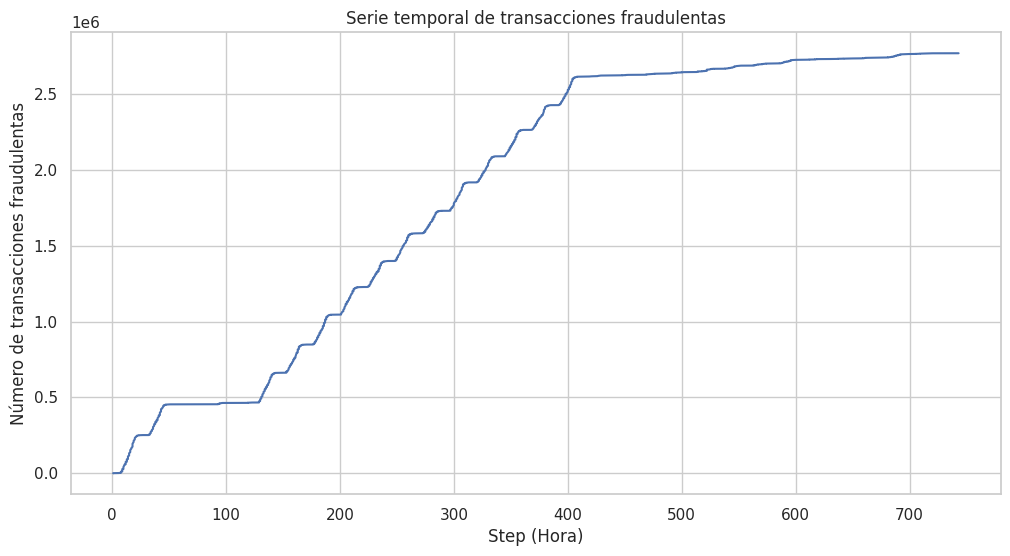

In [36]:
fraudulent_transactions = df[df['isFraud'] == 1]

plt.figure(figsize=(12, 6))

plt.plot(fraudulent_transactions['step'], fraudulent_transactions.index)

plt.title('Serie temporal de transacciones fraudulentas')
plt.xlabel('Step (Hora)')
plt.ylabel('Número de transacciones fraudulentas')

plt.grid(True)

plt.show()

In [38]:
df[["step"]].describe()

,step
count,2.767966e+06
mean,2.419503e+02
std,1.416647e+02
min,1.000000e+00
25%,1.550000e+02
50%,2.360000e+02
75%,3.320000e+02
max,7.430000e+02


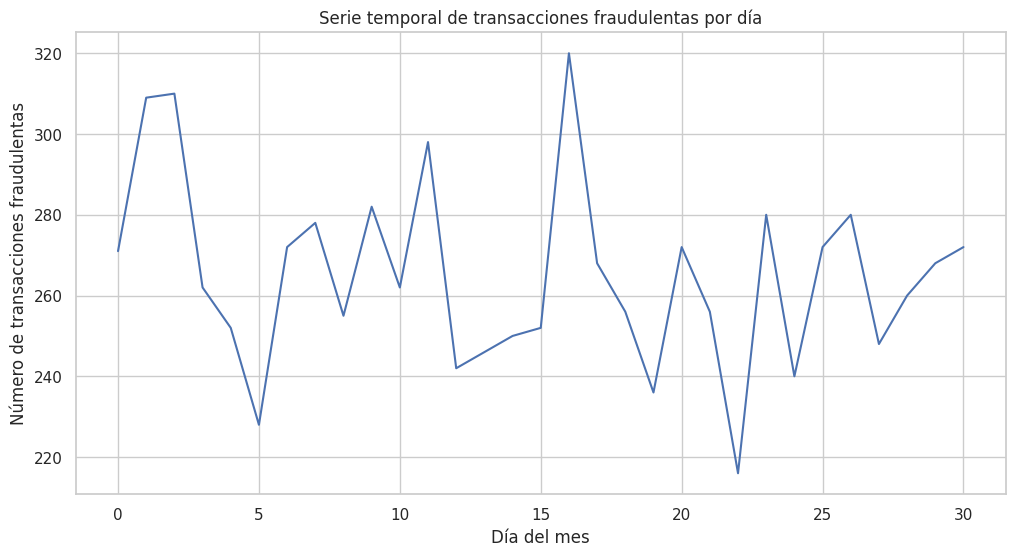

In [42]:
# Agrupar los datos por día
df['day'] = (df['step'] - 1) // 24

# Calcular el número de transacciones fraudulentas por día
fraudulent_transactions_per_day = df[df['isFraud'] == 1].groupby('day').size()

plt.figure(figsize=(12, 6))

plt.plot(fraudulent_transactions_per_day.index, fraudulent_transactions_per_day.values)

plt.title('Serie temporal de transacciones fraudulentas por día')
plt.xlabel('Día del mes')
plt.ylabel('Número de transacciones fraudulentas')

plt.grid(True)

plt.show()

***ANALISIS ESTADISTICO DE LOS DATOS Y EVALUACION DE MODELO DE ML***

In [12]:
#Frecuencia de Fraudes:
frecuencia_fraudes = df['fraude'].value_counts()
print(frecuencia_fraudes)


#Características Demográficas:
df_fraudes = df[df['fraude'] == 1]
caracteristicas_demograficas = df_fraudes['edad'].mean()
print(caracteristicas_demograficas)

#Distribución de Montos de Transacciones:
import matplotlib.pyplot as plt
plt.hist(df['monto'], bins=50, color='blue', alpha=0.7, label='Total')
plt.hist(df[df['fraude'] == 1]['monto'], bins=50, color='red', alpha=0.7, label='Fraude')
plt.legend()
plt.show()

#Análisis Temporal:
df['fecha'] = pd.to_datetime(df['fecha'])
df['hora'] = df['fecha'].dt.hour
fraude_por_hora = df[df['fraude'] == 1].groupby('hora')['fraude'].count()
print(fraude_por_hora)

#Análisis de Dispositivos:
dispositivos_fraude = df[df['fraude'] == 1]['dispositivo'].value_counts()
print(dispositivos_fraude)

#Patrones de Gasto Inusual:
df['z_score_monto'] = (df['monto'] - df['monto'].mean()) / df['monto'].std()
gasto_inusual = df[df['z_score_monto'] > 3]['fraude'].count()
print(gasto_inusual)


#Análisis de Texto en Descripciones de Transacciones:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
texto_vectorizado = vectorizer.fit_transform(df['descripcion'])

#Comparación entre Canales de Transacción:
canal_fraude = df[df['fraude'] == 1]['canal'].value_counts()
print(canal_fraude)


#Correlaciones entre Variables:
correlaciones = df.corr()
print(correlaciones)

#Desviaciones Estándar y Outliers:
std_monto = df['monto'].std()
outliers = df[df['monto'] > (df['monto'].mean() + 3 * std_monto)]

#Evaluación de Modelos de Aprendizaje Automático:
'''Para evaluar modelos de aprendizaje automático, puedes usar bibliotecas
como scikit-learn y TensorFlow, dependiendo del modelo que hayas utilizado.
La evaluación incluirá métricas como precisión, recall y F1-score.
Estos son ejemplos básicos y genéricos. Recuerda ajustarlos según tus
necesidades específicas y las características de tu conjunto de datos.
Además, ten en cuenta que algunos de los temas, como el análisis de texto en
descripciones de transacciones, pueden requerir enfoques más avanzados y específicos.'''

KeyError: 'fraude'